# Dataset link
https://www.kaggle.com/datasets/saurabh00007/iriscsv

In [189]:
import pandas as pd

# Loading dataset

In [190]:
df=pd.read_csv('D:\MECS\Internships\Oasis Infobyte\Datasets\Iris.csv')

In [191]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [192]:
df.drop(columns=['Id'],inplace=True)

# Checking some basic information of dataset

In [193]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [194]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [195]:
nums=df.select_dtypes(include='number')

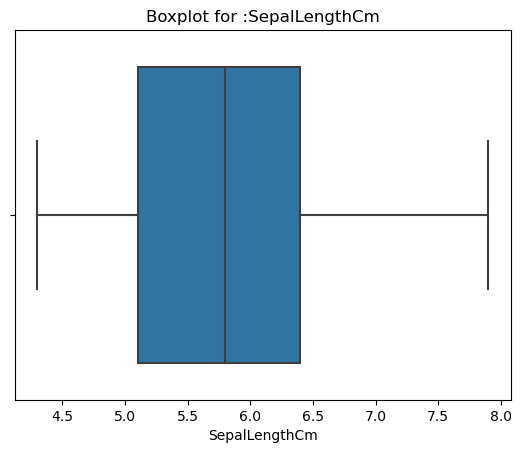

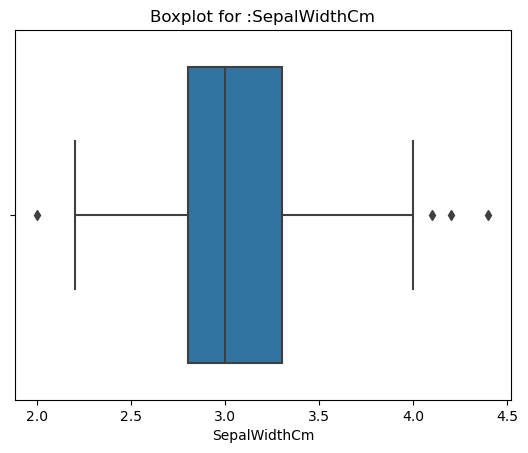

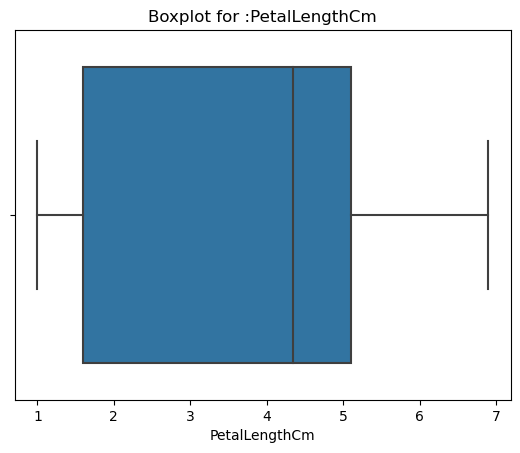

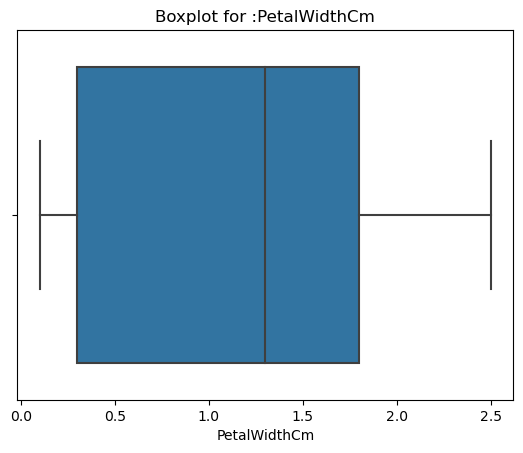

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in nums.columns:
    sns.boxplot(x=nums[i])
    plt.title("Boxplot for :"  +i) 
    plt.show()

In [197]:
df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

# Finding correlation of the attributes

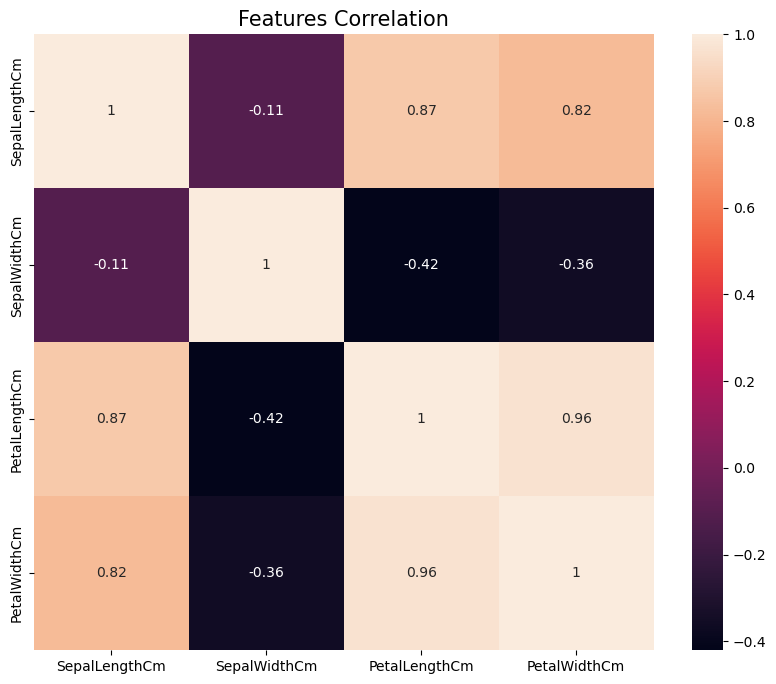

In [198]:
plt.figure(figsize=(10,8))
corr = nums.corr()
sns.heatmap(corr, annot=True)
plt.title("Features Correlation", fontsize = 15)
plt.show()

## Removing highly correlated column 

In [199]:
df.drop(columns=['PetalWidthCm'],inplace=True)

In [200]:
x=df.drop(columns=['Species'],axis=1)
y=df['Species']

# Splitting for training and testing

In [201]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [202]:
acu=[]
mod=[]

# Decision Tree Classifier

In [203]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
acc=accuracy_score(y_pred,y_test)
acu.append(acc)
mod.append("DecisionTree")
acc

0.9333333333333333

# SVC

In [210]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
acu.append(acc)
mod.append("SVC")
acc

0.9555555555555556

# Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
rd.fit(x_train,y_train)
y_pred=rd.predict(x_test)
acc=accuracy_score(y_pred,y_test)
acu.append(acc)
mod.append("RandomForest")
acc

0.9111111111111111

# Gaussian NB

In [206]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
acc=accuracy_score(y_pred,y_test)
acu.append(acc)
mod.append("GaussianNB")

In [207]:
mod

['DecisionTree', 'SVC', 'RandomForest', 'GaussianNB']

# Plotting accuracies

Text(0, 0.5, 'Accuracy')

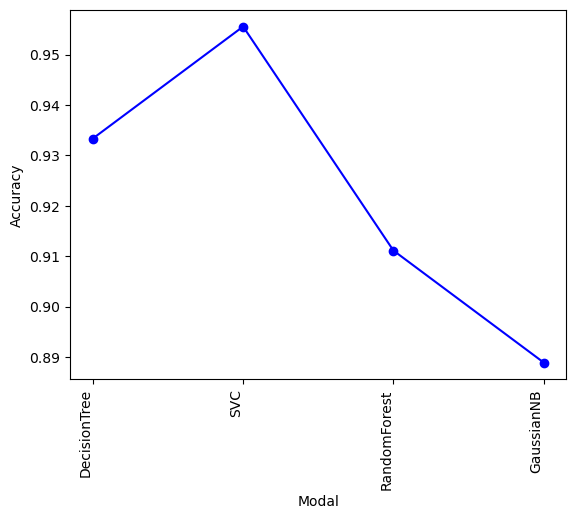

In [208]:
plt.plot(mod,acu,'b-o',label='Accuracy over Different models');
plt.xticks(rotation=90,ha='right') 
plt.xlabel('Modal') #labelling x axis
plt.ylabel('Accuracy') #labelling y axis

## Among all Support vector classifier gave maximum accuaracy of 96%

# Picking the model

In [212]:
import pickle

In [213]:
pickle.dump(svc,open('svc.pkl','wb'))

In [215]:
model=pickle.load(open('svc.pkl','rb'))

In [220]:
model.predict([[5,3,1]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)